<a href="https://colab.research.google.com/github/EricCallaway/COSC_6319_Project/blob/NavyaMakkena_COSC_6319_Project/biLSTM_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 71.1 MB/s 
     |████████████████████████████████| 596 kB 74.5 MB/s 
     |████████████████████████████████| 880 kB 71.1 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=b425d3b9074b12e99a01f9fc95ae883d319bad7df20d97f757887565c15fee99
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install datasets

     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 76.2 MB/s 
     |████████████████████████████████| 212 kB 86.8 MB/s 
     |████████████████████████████████| 136 kB 76.7 MB/s 
     |████████████████████████████████| 127 kB 84.5 MB/s 
     |████████████████████████████████| 144 kB 82.0 MB/s 
     |████████████████████████████████| 271 kB 82.7 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!pip install contractions

     |████████████████████████████████| 287 kB 5.2 MB/s 
     |████████████████████████████████| 106 kB 84.0 MB/s 


In [5]:
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum",'english')
train_report, train_summary = dataset['train']['text'][:100000], dataset['train']['summary'][:100000]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/english/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import contractions
import numpy as np
from nltk.stem import WordNetLemmatizer

def text_lowercase(text):
    return text.lower()

def remove_numbers(text):
    output_text = re.sub(r'\d+', '', text)
    return output_text

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_whitespace(text):
    return  text.strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = " ".join([word for word in str(text).split() if word not in stop_words])
    return filtered_text

def remove_html(dataText):
    return BeautifulSoup(dataText, "lxml").text

def contraction_mapping(text):
    expanded_words = []   
    for word in text.split():
    # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

def lemmatization(text):
   lemmatizer = WordNetLemmatizer()
   return " ".join([lemmatizer.lemmatize(word) for word in text.split()])



def cleaning_data(content):
    # Lowercase text
    content = text_lowercase(content)

    # Remove numbers
    content = remove_numbers(content)

    # remove punctuation
    content = remove_punctuation(content)

    # remove whitespace from text
    content = remove_whitespace(content)

    # remove html from string
    content = remove_html(content)

    # contraction mapping
    content = contraction_mapping(content)

    # remove stopwords
    content = remove_stopwords(content)

    # lemmatization
    content = lemmatization(content)
    return content


cleaned_text = []
for t in range(len(train_report)):
    cleaned_text.append(cleaning_data(train_report[t]))

print(cleaned_text[:5])

cleaned_summary = []
for t in range(len(train_summary)):
    cleaned_summary.append(cleaning_data(train_summary[t]))

print(cleaned_summary[:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['met office issued yellow weather warning wind covering wale england starting gmt wednesday evening travel power likely disrupted warning remain place thursday gust mph kmh likely could hit mph coast hill heavy blustery shower', 'atlantis resource unveiled marine energy device invergordon ahead shipped kirkwall trial device run european marine energy centre test site eday device stand ft tall weighs tonne two set blade single unit could generate enough power home', 'police called scene outside coral shop compton road harehills bst man taken hospital treatment condition known west yorkshire police said area cordoned officer remain scene force appealed information', 'a

In [7]:
cnt=0

for i in range(len(cleaned_summary)):
    if(len(cleaned_summary[i].split())<=2000):
        cnt=cnt+1
print(cnt/len(cleaned_summary))

1.0


In [7]:
max_text_len=210
max_summary_len=20

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
#cleaned_text =np.array(cleaned_text)
#cleaned_summary=np.array(cleaned_summary)

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
print(len(short_text))
print(len(short_summary))
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

article_tr,article_val,summary_tr,summary_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 
print(article_tr.shape)
print(article_val.shape)
print(summary_tr.shape)
print(summary_val.shape)

49578
49578
(44620,)
(4958,)
(44620,)
(4958,)


In [22]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(article_tr))

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
print(tot_cnt)

107799


In [9]:
from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 100000
article_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
# articles
article_tokenizer.fit_on_texts(list(article_tr))
article_sequences = article_tokenizer.texts_to_sequences(article_tr)
article_val_seq   =   article_tokenizer.texts_to_sequences(article_val)
art_word_index = article_tokenizer.word_index
print(len(art_word_index))
# summaries
summary_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
summary_tokenizer.fit_on_texts(list(summary_tr))
summary_sequences = summary_tokenizer.texts_to_sequences(summary_tr)
summary_val_seq   = summary_tokenizer.texts_to_sequences(summary_val) 
summary_word_index = summary_tokenizer.word_index
print(len(summary_word_index))

from keras.preprocessing.sequence import pad_sequences
import numpy as np

article_tr = pad_sequences(article_sequences, maxlen=max_text_len, padding='post', truncating='post')
summary_tr = pad_sequences(summary_sequences, maxlen=max_summary_len, padding='post', truncating='post')
article_val = pad_sequences(article_val_seq, maxlen=max_text_len, padding='post', truncating='post')
summary_val = pad_sequences(summary_val_seq, maxlen=max_summary_len, padding='post', truncating='post')

print(article_tr.shape)
print(summary_tr.shape)

107799
27567
(44620, 210)
(44620, 20)


In [24]:
import numpy as np

embeddings_index = {}
with open('/content/drive/My Drive/Colab Notebooks/glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix for articles
article_embedding_matrix = np.zeros(((len(art_word_index)+1), embedding_dim))
for word, i in art_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        article_embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(article_embedding_matrix.shape)

# Prepare embedding matrix for summaries
hits=0
misses = 0
summary_embedding_matrix = np.zeros((len(summary_word_index) + 1, embedding_dim))
for word, j in summary_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        summary_embedding_matrix[j] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(summary_embedding_matrix.shape)

Found 400001 word vectors.
Converted 68417 words (39382 misses)
(107800, 200)
Converted 23671 words (3896 misses)
(27568, 200)


In [25]:
from keras.layers import Embedding
import keras.initializers

encoder_embedding_layer = Embedding(
    input_dim = article_embedding_matrix.shape[0], #num_distinct_words
    output_dim = embedding_dim, #embedding_output_dims
    input_length = max_text_len, #max_sequence_length
    embeddings_initializer= keras.initializers.Constant(article_embedding_matrix),
    trainable = True
)

decoder_embedding_layer = Embedding(
    input_dim = summary_embedding_matrix.shape[0],
    output_dim = embedding_dim,
    input_length = max_summary_len,
    embeddings_initializer= keras.initializers.Constant(summary_embedding_matrix),
    trainable = True
)

In [26]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Bidirectional,TimeDistributed

# Input layer
encoder_input = layers.Input(shape=(max_text_len))
encoder_embedded = encoder_embedding_layer(encoder_input)

# Decoder -- LSTM
decoder_input = layers.Input(shape=(None,))
decoder_embedded = decoder_embedding_layer(decoder_input)

# Encoder 1 -- Bidirectional LSTM 1
encoder1_output, forward_h1, forward_c1 ,backward_h1, backward_c1= Bidirectional(layers.LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4,name="encoder1"),merge_mode="concat")(
    encoder_embedded
)
# Encoder 2 -- Bidirectional LSTM 2
encoder2_output, forward_h2, forward_c2 ,backward_h2, backward_c2= Bidirectional(layers.LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4,name="encoder2"),merge_mode="concat")(
    encoder1_output,initial_state=[forward_h1,backward_h1,forward_c1,backward_c1]
)
state_h2 =  layers.Concatenate()([forward_h2, backward_h2])
state_c2 =  layers.Concatenate()([forward_c2, backward_c2])
encoder2_state = [state_h2,state_c2]

# Pass the encoder 2 state to decoder LSTM layer, as initial state
decoder_LSTM= layers.LSTM(512,return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2,name="decoder")
decoder_output,decoder_state_h1 ,decoder_state_c1 = decoder_LSTM(
    decoder_embedded, initial_state=encoder2_state
)
# Dense layer with activation
decoder_dense = TimeDistributed(layers.Dense(len(summary_word_index)+1,activation='softmax'))
decoder_output = decoder_dense(decoder_output)

model = keras.Model([encoder_input, decoder_input], decoder_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 210)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 210, 200)     21560000    ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 210, 512),   935936      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256),                                                     
                                 (None, 256),                                                 

In [28]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [29]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [30]:
history=model.fit([article_tr,summary_tr[:,:-1]], summary_tr.reshape(summary_tr.shape[0],summary_tr.shape[1], 1)[:,1:] ,
                  epochs=50,
                  callbacks=[es],
                  batch_size=128, 
                  validation_data=([article_val,summary_val[:,:-1]], summary_val.reshape(summary_val.shape[0],summary_val.shape[1], 1)[:,1:]))
model.save("/content/drive/My Drive/Colab Notebooks/saved_models/biLSTM_article_model")

Epoch 1/50
349/349 [==============================] - 2063s 6s/step - loss: 5.0871 - sparse_categorical_accuracy: 0.3873 - val_loss: 4.4642 - val_sparse_categorical_accuracy: 0.4211
Epoch 2/50
349/349 [==============================] - 2454s 7s/step - loss: 4.4391 - sparse_categorical_accuracy: 0.4184 - val_loss: 4.1654 - val_sparse_categorical_accuracy: 0.4377
Epoch 3/50
349/349 [==============================] - 2454s 7s/step - loss: 4.1699 - sparse_categorical_accuracy: 0.4327 - val_loss: 3.9931 - val_sparse_categorical_accuracy: 0.4486
Epoch 4/50
349/349 [==============================] - 2437s 7s/step - loss: 3.9884 - sparse_categorical_accuracy: 0.4440 - val_loss: 3.8950 - val_sparse_categorical_accuracy: 0.4576
Epoch 5/50
349/349 [==============================] - 2422s 7s/step - loss: 3.8442 - sparse_categorical_accuracy: 0.4530 - val_loss: 3.8307 - val_sparse_categorical_accuracy: 0.4614
Epoch 6/50
349/349 [==============================] - 2418s 7s/step - loss: 3.7270 - spars

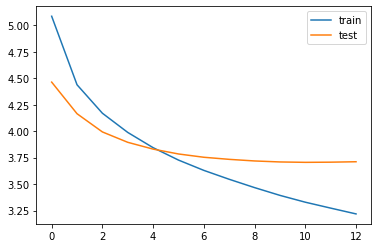

In [31]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

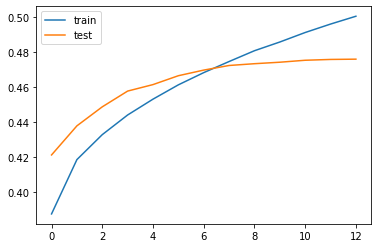

In [32]:
from matplotlib import pyplot
pyplot.plot(history.history['sparse_categorical_accuracy'], label='train')
pyplot.plot(history.history['val_sparse_categorical_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Inference setup

In [35]:
reverse_target_word_index= summary_tokenizer.index_word
reverse_source_word_index= article_tokenizer.index_word
target_word_index=summary_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = keras.Model(inputs=encoder_input,outputs=[encoder2_output, state_h2, state_c2])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_input =  Input(shape=( None,))
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
decoder_hidden_state_input = Input(shape=(max_text_len,512))
decode_input_states = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
decoder_embedded1 = decoder_embedding_layer(decoder_input)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h3, state_c3 = decoder_LSTM(decoder_embedded1, initial_state=decode_input_states)

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = keras.Model(
    [decoder_input] + [decoder_hidden_state_input, decoder_state_input_h,decoder_state_input_c],
    [decoder_outputs2] + [state_h3, state_c3])


def conversion_to_wordsummary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def conversion_to_articletext(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

def decode_sequence(input_seq):
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_index['sostok']
    decoded_sentence = ''
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    stop_condition = False
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out,e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

for i in range(0,5):
    print("Review:",conversion_to_articletext(article_tr[i]))
    print("Original summary:",conversion_to_wordsummary(summary_tr[i]))
    print("Predicted summary:",decode_sequence(article_tr[i].reshape(1,max_text_len)))
    print("\n")

for i in range(0,5):
    print("Review:",conversion_to_articletext(article_val[i]))
    print("Original summary:",conversion_to_wordsummary(summary_val[i]))
    print("Predicted summary:",decode_sequence(article_val[i].reshape(1,max_text_len)))
    print("\n")

Review: motheroftwo chelsea bennion tried pas container usually contain toy prisoner visiting hmp berwyn wrexham october two egg contained tablet buprenorphine heroin substitute used treat addiction bennion wrexham jailed week mold crown court court heard problem drug use within prison designed house men including assault gang culture inmate getting drug debt prison guard became suspicious found two egg one containing tablet hidden leg prisoner trouser bennion supervision time released prison supplying cannabis said delay getting case court turned life around judge rhys rowlands said pleaded guilty delay case needed go prison act deterrent others said people need realise take drug prison consequence follow prisoner ryan wolfe nuneaton warwickshire already serving six year sentence assault intent rob received additional eight month role 
Original summary: woman used kinder egg try smuggle drug uk largest prison jailed 
Predicted summary:  prison officer found guilty trying smuggle drug 

In [36]:
test_report, test_summary = dataset['test']['text'][:10], dataset['test']['summary'][:10]
cleaned_test_text = []
for t in range(len(test_report)):
    cleaned_test_text.append(cleaning_data(test_report[t]))


cleaned_test_summary = []
for t in range(len(test_summary)):
    cleaned_test_summary.append(cleaning_data(test_summary[t]))


import pandas as pd

cleaned_test_text =np.array(cleaned_test_text)
cleaned_test_summary=np.array(cleaned_test_summary)

short_test_text=[]
short_test_summary=[]

for i in range(len(cleaned_test_text)):
    if(len(cleaned_test_summary[i].split())<=max_summary_len and len(cleaned_test_text[i].split())<=max_text_len):
        short_test_text.append(cleaned_test_text[i])
        short_test_summary.append(cleaned_test_summary[i])
        
dataframe=pd.DataFrame({'text':short_test_text,'summary':short_test_summary})

dataframe['summary'] = dataframe['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 50000
test_article_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
# articles
test_article_tokenizer.fit_on_texts(list(dataframe['text']))
test_article_sequences = test_article_tokenizer.texts_to_sequences(dataframe['text'])

# summaries
test_summary_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
test_summary_tokenizer.fit_on_texts(list(dataframe['summary']))
test_summary_sequences = test_summary_tokenizer.texts_to_sequences(dataframe['summary'])


from keras.preprocessing.sequence import pad_sequences
import numpy as np

test_article = pad_sequences(test_article_sequences, maxlen=max_text_len, padding='post', truncating='post')
test_summary = pad_sequences(test_summary_sequences, maxlen=max_summary_len, padding='post', truncating='post')


for i in range(0,4):
    print("Review:",conversion_to_articletext(test_article[i]))
    print("Original summary:",conversion_to_wordsummary(test_summary[i]))
    print("Predicted summary:",decode_sequence(test_article[i].reshape(1,max_text_len)))
    print("\n")

['kate daileybbc news earlier week trump posted photo sitting desk maralargo permanent marker hovering notepad writing inaugural address winter white house maralago three week ago looking forward friday tweeted trump vow end american carnage trump angry call arm full text trump inauguration speech unclear whether presidentelect actually wrote speech content pure trump populist message resonated throughout primary campaign today merely transferring power one administration another one party another transferring power washington dc giving back people said beginning remark twitter bore eerie similarity batman villain bane speech dark night rise much someone posted second mashup two snarky reaction warned fox news commentator guy benson underestimate popular rhetoric trump supporter people panning speech still seem understand resonant never ignore theme still wrote referencing trump many callouts feel left american progress trump spoke country whose citizen long ignored coastal elite victo

Inference from loaded Model

In [11]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Bidirectional,TimeDistributed
reverse_target_word_index= summary_tokenizer.index_word
reverse_source_word_index= article_tokenizer.index_word
target_word_index=summary_tokenizer.word_index


loaded_model  = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved_models/biLSTM_article_model")
en_outputs,forward_state_h_enc,forward_state_c_enc,backward_state_h_enc,backward_state_c_enc = loaded_model.layers[4].output
concatenate = loaded_model.layers[6]
encoder_h = concatenate([forward_state_h_enc,backward_state_h_enc])
concatenate_1 = loaded_model.layers[7]
encoder_c = concatenate_1([forward_state_c_enc,backward_state_c_enc])
en_states=[forward_state_h_enc,forward_state_c_enc,backward_state_h_enc,backward_state_c_enc]
# Encode the input sequence to get the feature vector
encoder_model = keras.Model(inputs=loaded_model.input[0],outputs=[en_outputs, encoder_h ,encoder_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_input =  Input(shape=( None,))
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
decoder_hidden_state_input = Input(shape=(max_text_len,512))
decode_input_states = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
dec_inputs = loaded_model.input[1]
dec_emb_layer = loaded_model.layers[5]
dec_lstm = loaded_model.layers[8]
dec_embedding= dec_emb_layer(dec_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs, state_h3, state_c3 = dec_lstm(dec_embedding, initial_state=decode_input_states)

# A dense softmax layer to generate prob dist. over the target vocabulary
dec_dense = loaded_model.layers[9]
decoder_outputs = dec_dense(decoder_outputs)

# Final decoder model
decoder_model = keras.Model(
    [dec_inputs] + [decoder_hidden_state_input]+ [decode_input_states],
    [decoder_outputs] + [state_h3, state_c3])


def conversion_to_wordsummary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def conversion_to_articletext(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

def decode_sequence(input_seq):
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_index['sostok']
    decoded_sentence = ''
    e_out, en_h,en_c = encoder_model.predict(input_seq)
    stop_condition = False
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, en_h,en_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

for i in range(0,5):
    print("Review:",conversion_to_articletext(article_tr[i]))
    print("Original summary:",conversion_to_wordsummary(summary_tr[i]))
    print("Predicted summary:",decode_sequence(article_tr[i].reshape(1,max_text_len)))
    print("\n")

for i in range(0,5):
    print("Review:",conversion_to_articletext(article_val[i]))
    print("Original summary:",conversion_to_wordsummary(summary_val[i]))
    print("Predicted summary:",decode_sequence(article_val[i].reshape(1,max_text_len)))
    print("\n")

Review: motheroftwo chelsea bennion tried pas container usually contain toy prisoner visiting hmp berwyn wrexham october two egg contained tablet buprenorphine heroin substitute used treat addiction bennion wrexham jailed week mold crown court court heard problem drug use within prison designed house men including assault gang culture inmate getting drug debt prison guard became suspicious found two egg one containing tablet hidden leg prisoner trouser bennion supervision time released prison supplying cannabis said delay getting case court turned life around judge rhys rowlands said pleaded guilty delay case needed go prison act deterrent others said people need realise take drug prison consequence follow prisoner ryan wolfe nuneaton warwickshire already serving six year sentence assault intent rob received additional eight month role 
Original summary: woman used kinder egg try smuggle drug uk largest prison jailed 
Predicted summary:  prison officer two men woman convicted drug deal